In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import cv2
from skimage import io
from skimage.filters import sobel
from glob import glob
from PIL import Image

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/HAM10000_images_part_2.zip','r')as obj1:
  obj1.extractall('/content/HAM10000_images_part_2')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
skin_df = pd.read_csv("/content/HAM10000_metadata.csv")

In [ ]:
skin_df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
pd.read_csv("/content/HAM10000_metadata.csv", usecols=['image_id', 'dx'])

image_id     dx
0      ISIC_0027419    bkl
1      ISIC_0025030    bkl
2      ISIC_0026769    bkl
3      ISIC_0025661    bkl
4      ISIC_0031633    bkl
...             ...    ...
10010  ISIC_0033084  akiec
10011  ISIC_0033550  akiec
10012  ISIC_0033536  akiec
10013  ISIC_0032854  akiec
10014  ISIC_0032258    mel

[10015 rows x 2 columns]

In [ ]:
print(skin_df[skin_df['dx'] == 'bkl']['image_id'])

0       ISIC_0027419
1       ISIC_0025030
2       ISIC_0026769
3       ISIC_0025661
4       ISIC_0031633
            ...     
3326    ISIC_0025366
7100    ISIC_0028977
9546    ISIC_0032655
9630    ISIC_0033620
9631    ISIC_0034040
Name: image_id, Length: 1099, dtype: object


In [ ]:
skin_df['dx']

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content


In [ ]:
os.chdir("..")
main_data_dir = os.getcwd()
print(main_data_dir)

/


In [ ]:
os.chdir(current_dir + "/reorganised")
reorganised_dir = os.getcwd()
print(reorganised_dir)

/content/reorganised


In [ ]:
os.chdir(current_dir + "/all_images")
all_images_dir = os.getcwd()
print(all_images_dir)

/content/all_images


In [ ]:
label = skin_df['dx'].unique().tolist()
label

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [ ]:
for i in label:
    (skin_df[skin_df['dx'] == i]['image_id']).unique().tolist()

In [ ]:
os.chdir(all_images_dir)
print(os.getcwd())

/content/all_images


[[[221 131 131]
  [222 128 126]
  [223 129 127]
  ...
  [229 134 138]
  [226 136 138]
  [230 135 139]]

 [[223 129 129]
  [225 130 126]
  [228 132 133]
  ...
  [225 135 137]
  [226 136 136]
  [226 134 135]]

 [[222 128 126]
  [229 129 131]
  [231 130 134]
  ...
  [224 136 132]
  [227 136 133]
  [228 137 134]]

 ...

 [[209 118 125]
  [210 119 126]
  [212 121 126]
  ...
  [210 140 128]
  [209 141 130]
  [207 139 128]]

 [[205 116 118]
  [208 119 121]
  [209 120 124]
  ...
  [210 142 129]
  [212 144 131]
  [211 143 130]]

 [[207 116 115]
  [209 120 116]
  [208 120 118]
  ...
  [208 143 125]
  [211 146 126]
  [209 144 124]]]


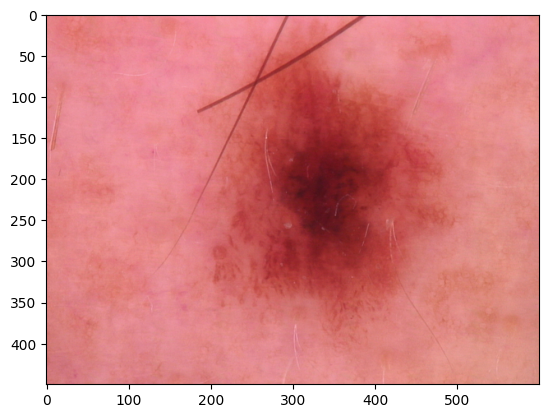

In [ ]:
my_image = plt.imread("/content/all_images/HAM10000_images_part_1/ISIC_0024306.jpg")
print(my_image)
plt.imshow(my_image)

In [ ]:
print(my_image.shape)

(450, 600, 3)


In [ ]:
# image = Image.open('ISIC_0024306.jpg')

In [ ]:
new_image = sobel(my_image)

In [ ]:
os.chdir(main_data_dir)

In [ ]:
# os.mkdir(os.path.join(main_data_dir, 'edge_detected_images'))

In [ ]:
os.chdir(os.path.join(current_dir, 'edge_detected_images'))

In [ ]:
print(os.getcwd())

/content/edge_detected_images


In [ ]:
# cv2.imwrite(os.path.join(os.getcwd(), 'edge_image2.jpg'), my_image)

In [ ]:
# image_ok = Image.fromarray(image)

In [ ]:
print(my_image)

[[[221 131 131]
  [222 128 126]
  [223 129 127]
  ...
  [229 134 138]
  [226 136 138]
  [230 135 139]]

 [[223 129 129]
  [225 130 126]
  [228 132 133]
  ...
  [225 135 137]
  [226 136 136]
  [226 134 135]]

 [[222 128 126]
  [229 129 131]
  [231 130 134]
  ...
  [224 136 132]
  [227 136 133]
  [228 137 134]]

 ...

 [[209 118 125]
  [210 119 126]
  [212 121 126]
  ...
  [210 140 128]
  [209 141 130]
  [207 139 128]]

 [[205 116 118]
  [208 119 121]
  [209 120 124]
  ...
  [210 142 129]
  [212 144 131]
  [211 143 130]]

 [[207 116 115]
  [209 120 116]
  [208 120 118]
  ...
  [208 143 125]
  [211 146 126]
  [209 144 124]]]


In [ ]:
print(new_image)

[[[0.20790224 0.2093309  0.00941636]
  [0.21182919 0.21526711 0.00573585]
  [0.21327243 0.21773109 0.01237846]
  ...
  [0.21034953 0.20548066 0.00748252]
  [0.20833602 0.2027984  0.00674947]
  [0.21110531 0.20467061 0.00900659]]

 [[0.21234507 0.21425588 0.00627119]
  [0.21652258 0.2182121  0.00807461]
  [0.21929706 0.21851623 0.01566584]
  ...
  [0.20637876 0.20592723 0.00880877]
  [0.20592062 0.20520332 0.00838961]
  [0.20816713 0.20703396 0.00774551]]

 [[0.21600263 0.21822935 0.00782652]
  [0.22146124 0.21997823 0.01250641]
  [0.22418223 0.2188241  0.00955149]
  ...
  [0.20279247 0.20859614 0.00880877]
  [0.20512246 0.21001608 0.00816707]
  [0.20764279 0.21183935 0.00586872]]

 ...

 [[0.20402838 0.19278608 0.01771953]
  [0.20403402 0.19327049 0.01261878]
  [0.20420864 0.19585036 0.0099368 ]
  ...
  [0.15728262 0.18453653 0.02734098]
  [0.15625085 0.18314756 0.02717827]
  [0.15596429 0.18262046 0.02729883]]

 [[0.20359195 0.19849264 0.01910036]
  [0.20293935 0.19811403 0.01920491]


In [ ]:
os.chdir(reorganised_dir)
print(os.getcwd())

/content/reorganised


In [ ]:
# for i in

In [ ]:
plt.imsave('okmy.jpg', sobel(my_image), format='jpg')

In [ ]:
# plt.savefig(new_image)

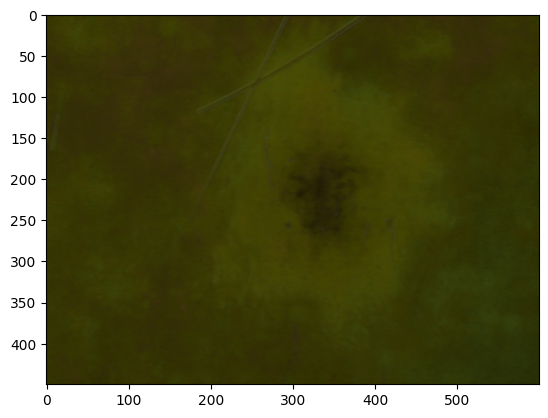

In [ ]:
plt.imshow(sobel(my_image))

In [ ]:
# for root, dirname, filename in os.walk(main_data_dir):
#     print(dirname)

In [ ]:
# print(os.getcwd())

In [ ]:
# var = os.path.join(all_images_dir, reorganised_bcc)
# var

In [ ]:
# os.chdir('C:\Backup\TY BTech\Internship\Machine Learning\ML Project 1')

In [ ]:
# print(os.getcwd())

In [ ]:
# a = os.getcwd()
# lol = os.path.join(a, all_images_dir)

In [ ]:
# lol

In [ ]:
os.chdir(main_data_dir)
print(os.getcwd())
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('all_images', '*.jpg'))}
image_path
#Define the path and add as a new column
skin_df['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
# skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((32,32))))
skin_df

/


lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

       path  
0      None  
1      None  
2      None  
3      None  
4      None  
...     ...  
10010  None  
10011  None  
10012  None  
10013  None  
10014  None  

[10015 rows x 8 columns]

In [ ]:
os.path.basename(os.path.join(all_images_dir, 'ISIC_0024306.jpg'))

'ISIC_0024306.jpg'

In [ ]:
# os.rename(os.path.join(all_images_dir, 'ISIC_0024307.jpg'), f"{reorganised_dir}/{os.path.basename(os.path.join(all_images_dir, 'ISIC_0024307.jpg'))}")

In [ ]:
print(all_images_dir)

/content/all_images


In [ ]:

source_folder = os.path.join('/content/all_images/HAM10000_images_part_2/ISIC_0024306.jpg')
# destination_folder = f"{reorganised_dir}/{os.path.basename(os.path.join(all_images_dir, 'reorganised_ISIC_0024307.jpg'))}"
destination_folder = os.path.join(all_images_dir, 'HAM10000_images_part_1')

# source_path = f'{source_folder}/{image_filename}'
# destination_path = f'{destination_folder}/{image_filename}'

shutil.copy(source_folder, destination_folder)

print(f"Image copied from '{source_folder}' to '{destination_folder}'")

FileNotFoundError: ignored

In [ ]:
print(os.getcwd())

/


In [ ]:
os.chdir(all_images_dir)
print(os.getcwd())


/content/all_images


In [ ]:
my_new_image = plt.imread("/content/all_images/resized_skin_lesion_images/resized_ISIC_0024306.jpg")

In [ ]:
my_latest_image = plt.imread("/content/all_images/HAM10000_images_part_1/ISIC_0024306.jpg")

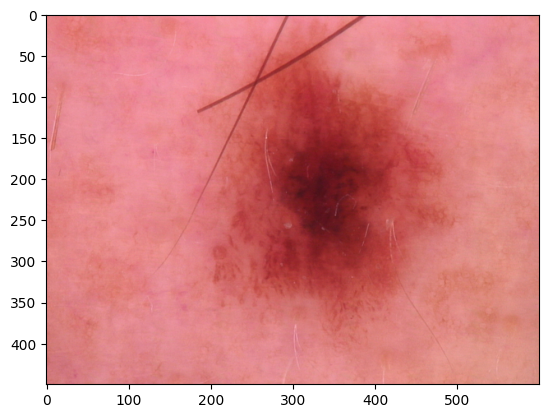

In [ ]:
plt.imshow(my_latest_image)

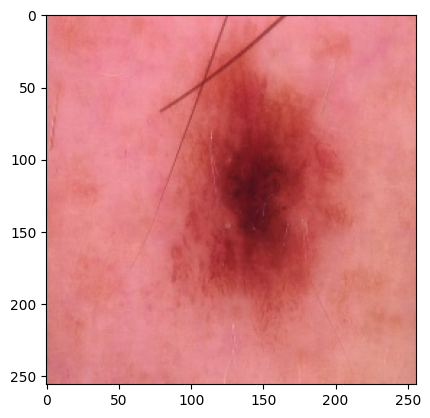

In [ ]:
plt.imshow(my_new_image)

In [ ]:
print(reorganised_dir)

In [ ]:
for i in glob(os.path.join('/content/all_images/HAM10000_images_part_2', '*.jpg')):
  # print(i)
  os.rename(i, os.path.join('/content/all_images/HAM10000_images_part_1', os.path.basename(i)))

In [ ]:
print(os.getcwd())

/content/all_images


In [ ]:
source_folder = '/content/all_images'
target_folder = '/content/drive/MyDrive/TARGET_FOLDER)'

shutil.copytree(source_folder, target_folder)

In [ ]:
os.chdir(all_images_dir)

In [ ]:
# os.makedirs('resized_skin_lesion_images')

In [ ]:
target_width = target_height = 256

In [ ]:
print(os.getcwd())

/content/all_images


In [ ]:
for i in glob(os.path.join('/content/all_images/HAM10000_images_part_1', '*.jpg')):
  image = cv2.imread(i)
  resized_image = cv2.resize(image, (target_width, target_height))
  output_path = os.path.join('/content/all_images/resized_skin_lesion_images', 'resized_'+os.path.basename(i))
  cv2.imwrite(output_path, resized_image)
  print(i)

/content/all_images/HAM10000_images_part_1/ISIC_0028668.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0026696.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0025119.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0028392.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0027784.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0024700.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0027112.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0028483.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0024652.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0027033.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0026781.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0024764.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0028109.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0026548.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0027335.jpg
/content/all_images/HAM10000_images_part_1/ISIC_0025520.jpg
/content/all_images/HAM10000_images_part

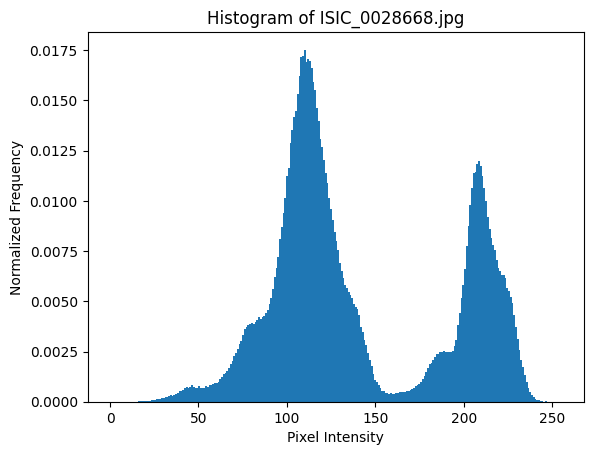

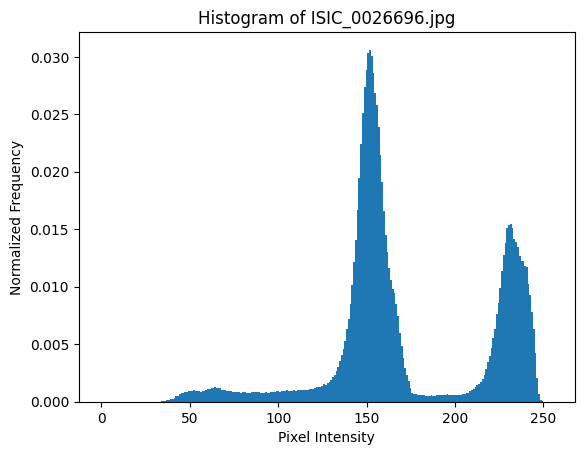

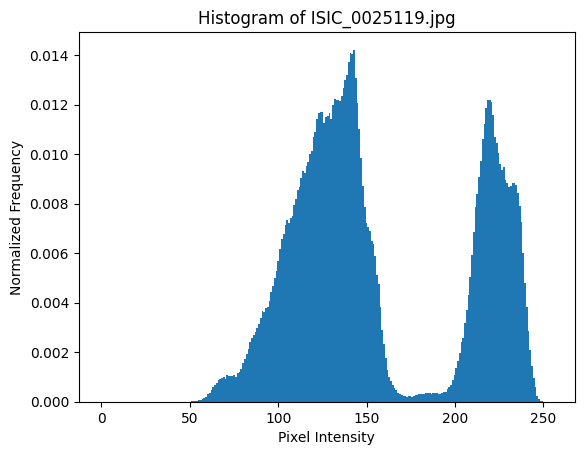

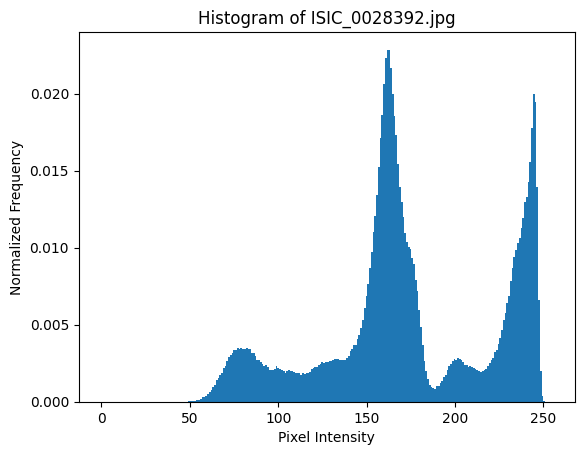

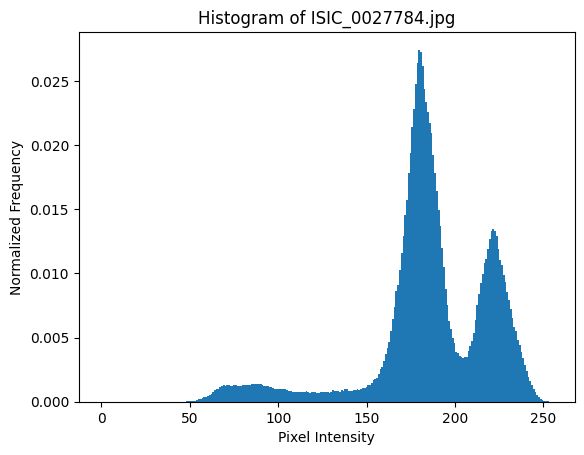

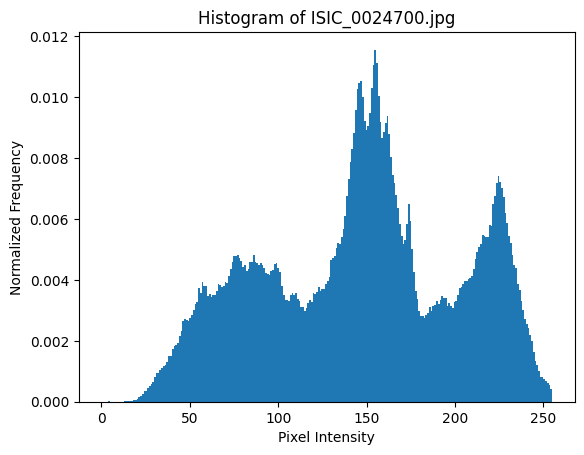

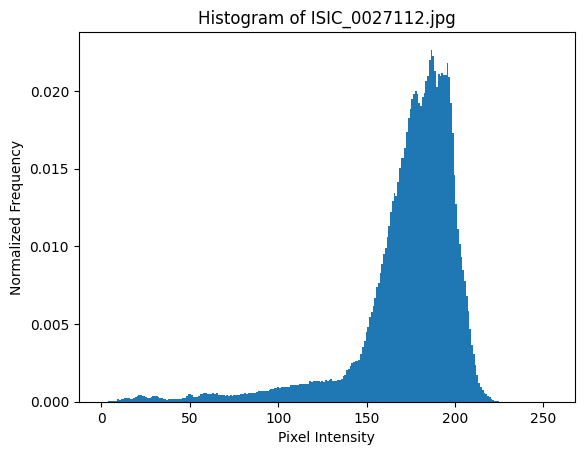

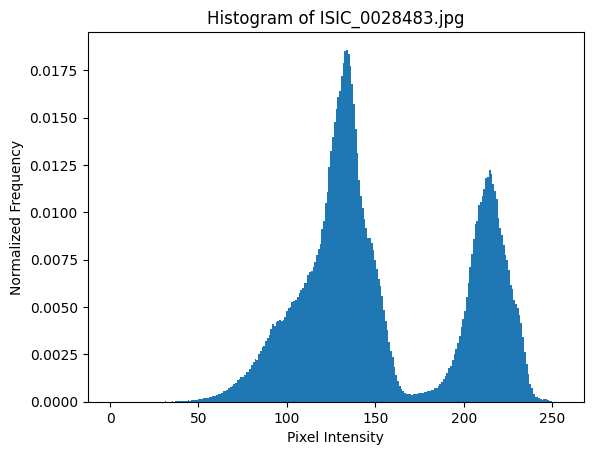

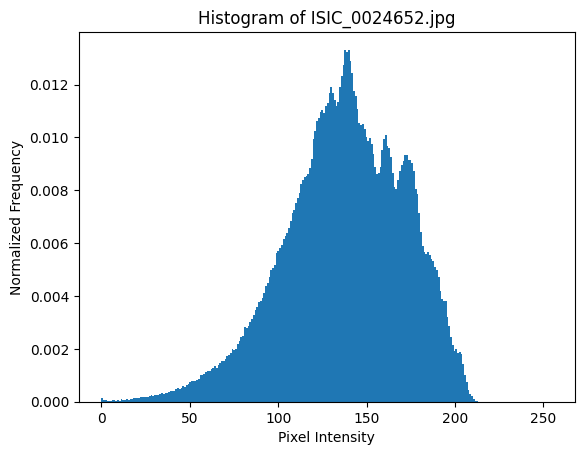

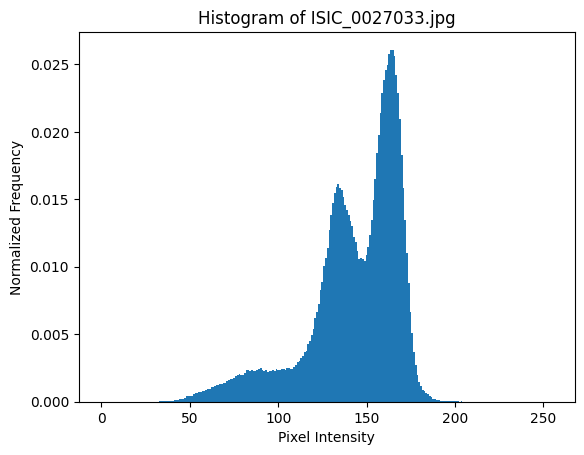

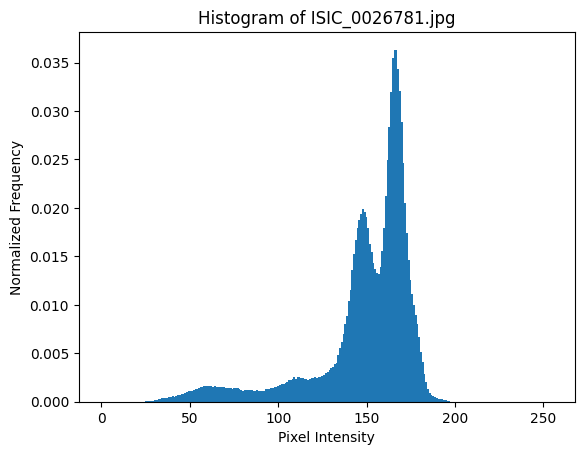

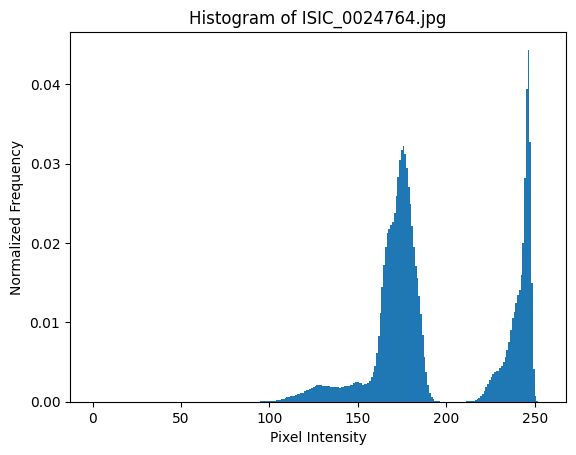

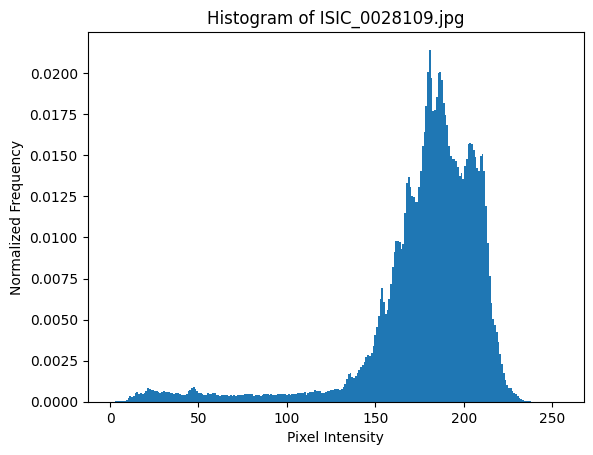

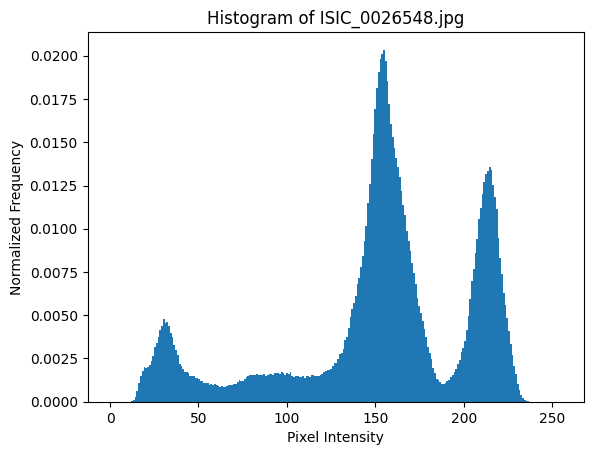

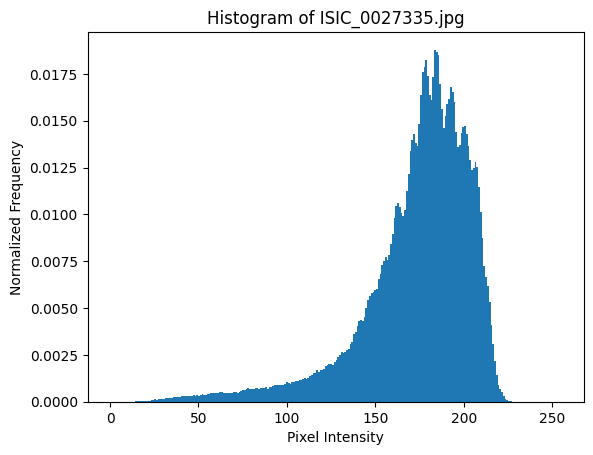

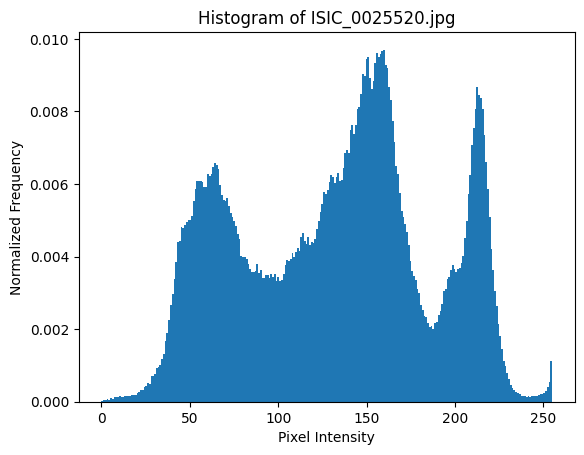

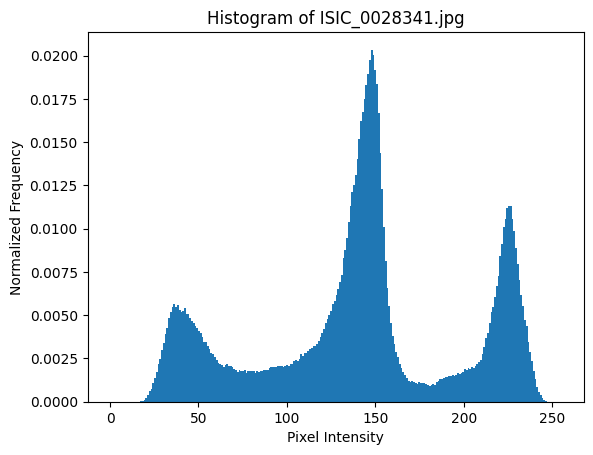

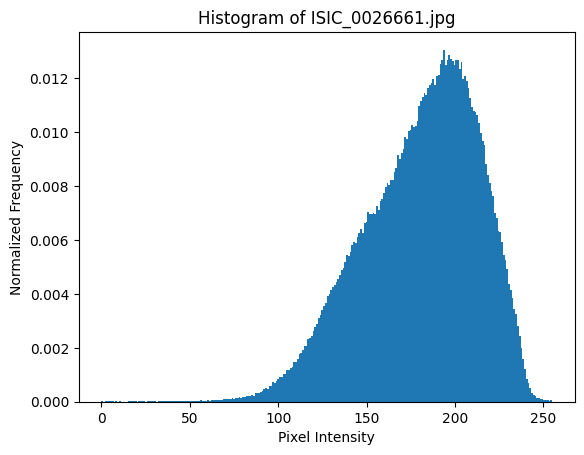

KeyboardInterrupt: ignored

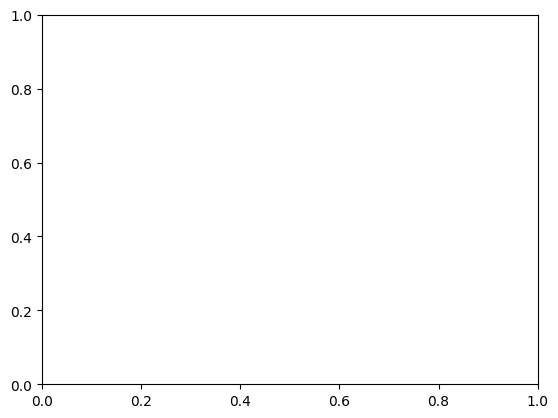

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your dataset images
image_folder = '/content/all_images/HAM10000_images_part_1'

# List all image files in the image folder
image_files = os.listdir(image_folder)

# Iterate through the image files
for image_file in image_files:
    if image_file.endswith(".jpg"):  # Assuming images are in JPG format
        image_path = os.path.join(image_folder, image_file)

        # Load the image
        image = Image.open(image_path)
        image_array = np.array(image)

        # Plot histogram of pixel intensity values
        plt.hist(image_array.ravel(), bins=256, range=(0, 255), density=True)
        plt.title(f"Histogram of {image_file}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Normalized Frequency")
        plt.show()






In [ ]:
import os
import numpy as np
from skimage import io, color
from skimage.filters import threshold_local
from skimage.morphology import binary_closing, disk

# Paths to your dataset images and output mask folder
image_folder = '/content/all_images/HAM10000_images_part_1'
output_mask_folder = '/content/ouput_mask2'

# Create the output mask folder if it doesn't exist
os.makedirs(output_mask_folder, exist_ok=True)

# List all image files in the image folder
image_files = os.listdir(image_folder)

# Iterate through the image files
for image_file in image_files:
    if image_file.endswith(".jpg"):  # Assuming images are in JPG format
        image_path = os.path.join(image_folder, image_file)

        # Load the image
        image = io.imread(image_path)
        gray_image = color.rgb2gray(image)

        # Calculate adaptive threshold
        block_size = 35  # Adjust as needed
        adaptive_mask = gray_image > threshold_local(gray_image, block_size, offset=0)

        # Apply morphological operations for noise reduction (optional)
        selem = disk(3)
        cleaned_mask = binary_closing(adaptive_mask, selem=selem)

        # Save the mask as an image
        mask_filename = f"{os.path.splitext(image_file)[0]}_adaptive_mask.png"
        mask_path = os.path.join(output_mask_folder, mask_filename)
        io.imsave(mask_path, cleaned_mask.astype(np.uint8) * 255)


<ipython-input-76-8720c1a9f0a6>:32: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(adaptive_mask, selem=selem)


KeyboardInterrupt: ignored

In [ ]:
import os
import numpy as np
from skimage import io, color
from skimage.filters import threshold_otsu
from skimage.morphology import binary_closing, disk

# Paths to your dataset images and output mask folder
image_folder = '/content/all_images/HAM10000_images_part_1'
output_mask_folder = '/content/output_mask'

# Create the output mask folder if it doesn't exist
os.makedirs(output_mask_folder, exist_ok=True)

# List all image files in the image folder
image_files = os.listdir(image_folder)

# Iterate through the image files
for image_file in image_files:
    if image_file.endswith(".jpg"):  # Assuming images are in JPG format
        image_path = os.path.join(image_folder, image_file)

        # Load the image
        image = io.imread(image_path)
        gray_image = color.rgb2gray(image)

        # Calculate Otsu's threshold
        threshold_value = threshold_otsu(gray_image)

        # Create a binary mask using Otsu's threshold
        binary_mask = gray_image > threshold_value

        # Apply morphological operations for noise reduction (optional)
        selem = disk(3)
        cleaned_mask = binary_closing(binary_mask, selem=selem)

        # Save the mask as an image
        mask_filename = f"{os.path.splitext(image_file)[0]}_mask.png"
        mask_path = os.path.join(output_mask_folder, mask_filename)
        io.imsave(mask_path, cleaned_mask.astype(np.uint8) * 255)


<ipython-input-24-1f72fb96f729>:34: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  cleaned_mask = binary_closing(binary_mask, selem=selem)
<ipython-input-24-1f72fb96f729>:39: UserWarning: /content/output_mask/ISIC_0030954_mask.png is a low contrast image
  io.imsave(mask_path, cleaned_mask.astype(np.uint8) * 255)
<ipython-input-24-1f72fb96f729>:39: UserWarning: /content/output_mask/ISIC_0029187_mask.png is a low contrast image
  io.imsave(mask_path, cleaned_mask.astype(np.uint8) * 255)
<ipython-input-24-1f72fb96f729>:39: UserWarning: /content/output_mask/ISIC_0028495_mask.png is a low contrast image
  io.imsave(mask_path, cleaned_mask.astype(np.uint8) * 255)
<ipython-input-24-1f72fb96f729>:39: UserWarning: /content/output_mask/ISIC_0030303_mask.png is a low contrast image
  io.imsave(mask_path, cleaned_mask.astype(np.uint8) * 255)
<ipython-input-24-1f72fb96f729>:39: UserWarning: /content/ou

In [ ]:
del

SyntaxError: ignored

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Path to the folder containing all HAM10000 images
image_folder = '/content/all_images/HAM10000_images_part_1'
mask_folder = '/content/output_mask'  # Path to the folder containing corresponding masks

# List all image files
image_files = os.listdir(image_folder)
# print(image_files)

# Create empty lists to store data and masks
images=[]
masks=[]
# Load images and corresponding masks
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    mask_file = os.path.join(mask_folder, image_file.replace('.jpg', '_mask.png'))
    # print(mask_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128,128))
    images.append(image)

    mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
    # print(mask)
    mask = cv2.resize(mask, (128, 128))
    masks.append(mask)

# Convert lists to numpy arrays
images = np.array(images) / 255.0
masks = np.array(masks) / 255.0

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)


In [ ]:
del skin_df

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def unet(input_shape):
    # Contracting path (encoder)
    inputs = keras.Input(shape=input_shape)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottom of the U-Net
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Expansive path (decoder)
    up6 = layers.UpSampling2D(size=(2, 2))(conv5)
    concat6 = layers.Concatenate()([conv4, up6])
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(concat6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.UpSampling2D(size=(2, 2))(conv6)
    concat7 = layers.Concatenate()([conv3, up7])
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(concat7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.UpSampling2D(size=(2, 2))(conv7)
    concat8 = layers.Concatenate()([conv2, up8])
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.UpSampling2D(size=(2, 2))(conv8)
    concat9 = layers.Concatenate()([conv1, up9])
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output layer (no specified number of classes)
    # No output layer in this case

    model = keras.Model(inputs, conv9)
    return model

# Create the U-Net model
input_shape = (128, 128, 3)  # Change this based on your input image dimensions
model = unet(input_shape)

# Print model summary
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_98 (Conv2D)             (None, 128, 128, 64  1792        ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_99 (Conv2D)             (None, 128, 128, 64  36928       ['conv2d_98[0][0]']              
                                )                                                           

In [ ]:
input_size = (128, 128, 3)
model = unet(input_size)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=1, validation_data=(x_test, y_test))



In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

ValueError: ignored

In [ ]:
del image_path

In [ ]:
import os
import cv2
import numpy as np
from tensorflow import keras

# Load the trained U-Net model
# model = keras.models.load_model('path_to_your_model.h5')

# Define input image dimensions
input_shape = (128, 128)  # Change this based on your model's input size

# Path to the folder containing test images
test_images_folder = '/content/all_images/HAM10000_images_part_1'
predicted_masks_folder = 'predicted_masks'
os.makedirs(predicted_masks_folder, exist_ok=True)

# Loop through test images and generate predicted masks
for image_filename in os.listdir(test_images_folder):
    image_path = os.path.join(test_images_folder, image_filename)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.resize(image, input_shape)  # Resize to match input shape
    image = image / 255.0  # Normalize pixel values

    # Predict the segmentation mask
    predicted_mask = model.predict(np.expand_dims(image, axis=0))[0]

    # Convert to binary mask
    binary_mask = (predicted_mask > 0.5).astype(np.uint8) * 255

    # Save the binary mask
    mask_filename = image_filename.replace('.jpg', '_mask.png')
    mask_path = os.path.join(predicted_masks_folder, mask_filename)
    cv2.imwrite(mask_path, binary_mask)

print("Predicted masks saved in:", predicted_masks_folder)

1/1 [==============================] - 0s 20ms/step


KeyboardInterrupt: ignored

In [ ]:
predicted_masks = model.predict(x_test)

# Assuming predicted_masks are pixel-wise class probabilities, you can threshold them
threshold = 0.5  # Adjust as needed
binary_predicted_masks = (predicted_masks > threshold).astype(np.uint8)
# cv2.imwrite(os.path.join(output_folder, combined_filename), combined_image)

# Save segmented images and masks
output_folder = '/content/mask_comparitive'  # Replace with the path where you want to save the results
os.makedirs(output_folder, exist_ok=True)


# Save the predicted masks as images
for i, mask in enumerate(predicted_masks):
    mask = np.squeeze(mask)  # Remove the channel dimension if present
    mask *= 255.0  # Scale to [0, 255]
    mask = mask.astype(np.uint8)  # Convert to uint8

    mask_filename = f'mask_{i}.png'  # Change the filename format if needed
    mask_path = os.path.join(output_folder, mask_filename)

    cv2.imwrite(mask_path, mask)

print("Predicted masks saved in:", output_folder)

# print("Combined images and masks saved to:", output_folder)

63/63 [==============================] - 5s 85ms/step
Predicted masks saved in: /content/mask_comparitive


In [ ]:
del binary_predicted_masks

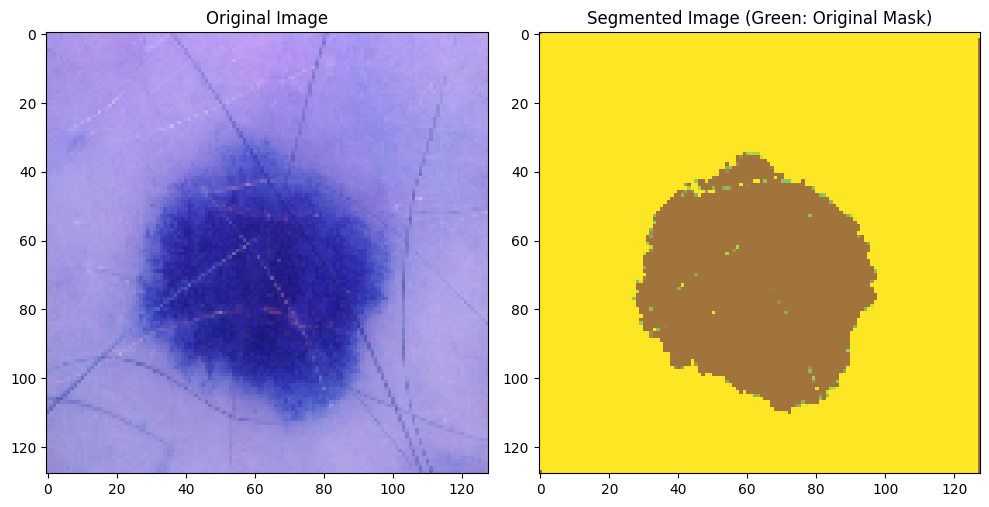

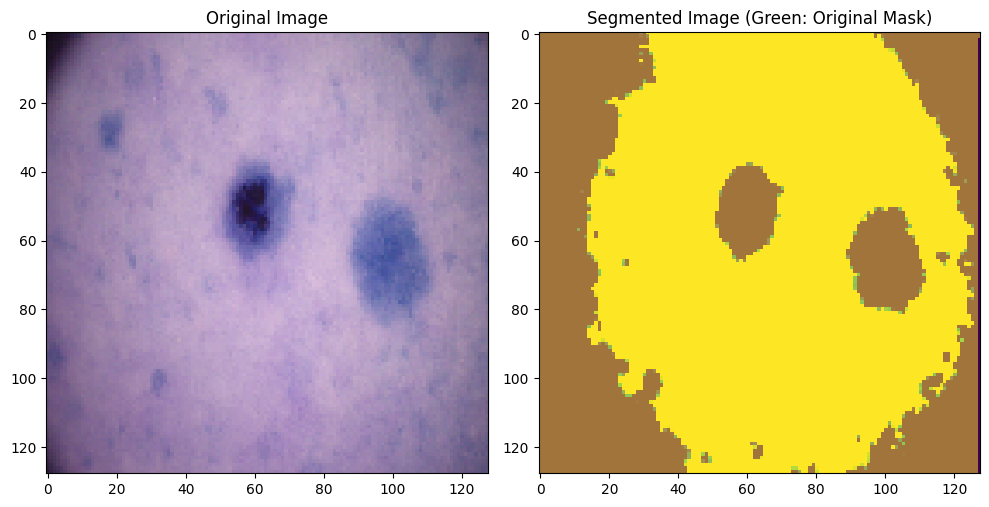

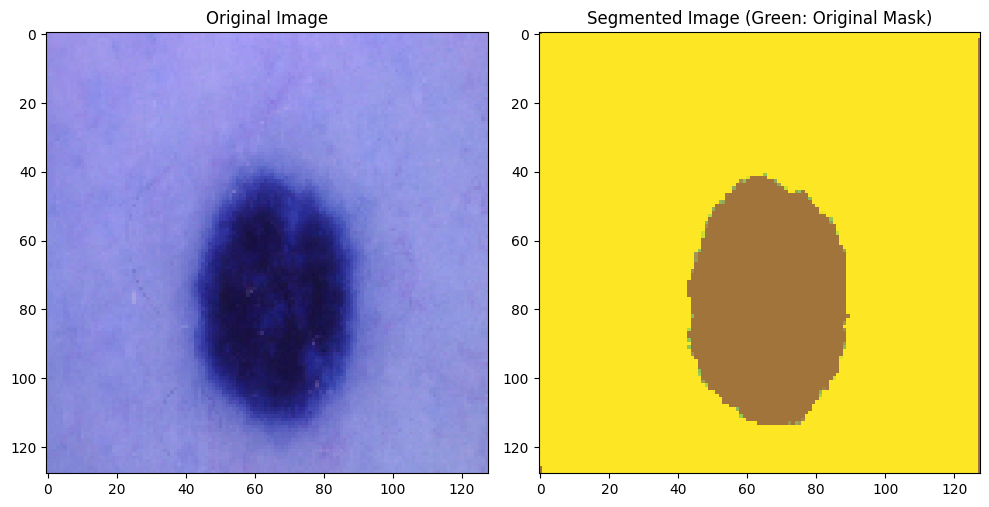

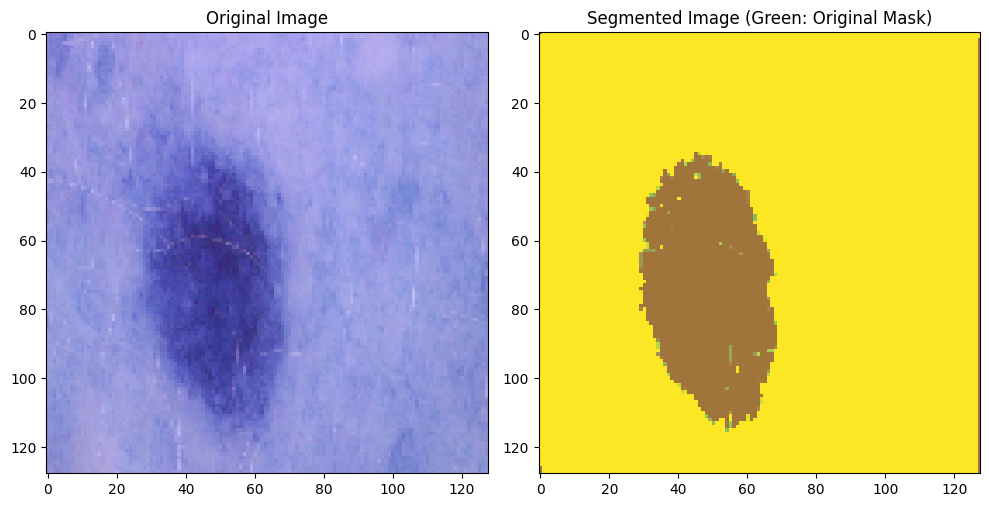

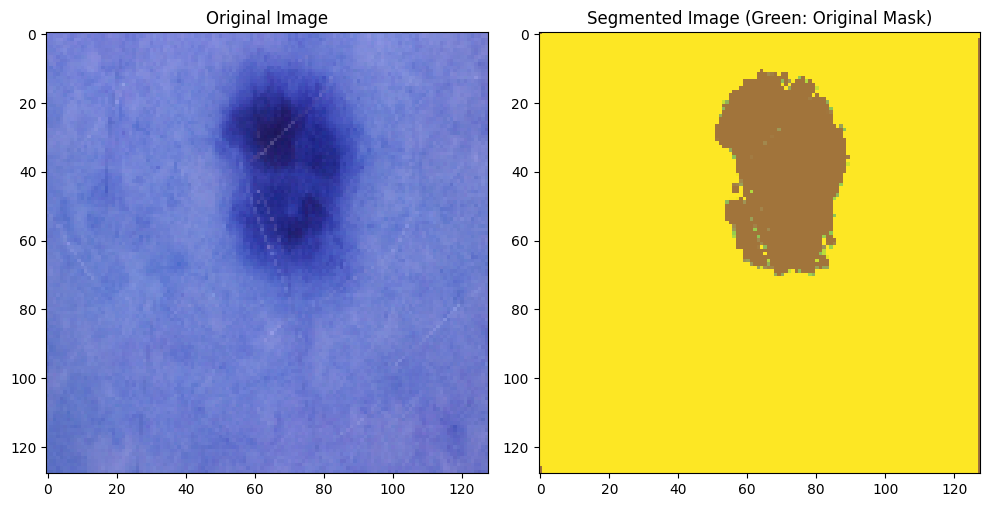

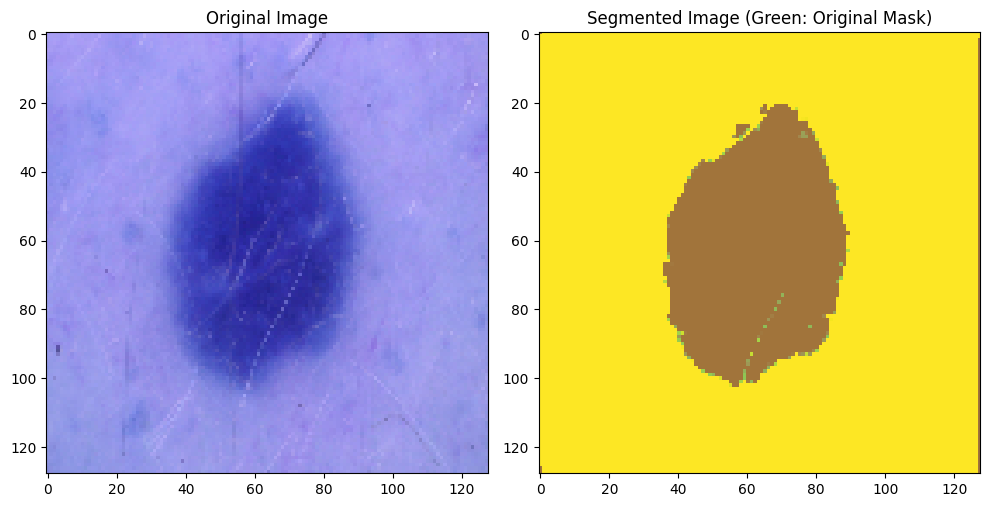

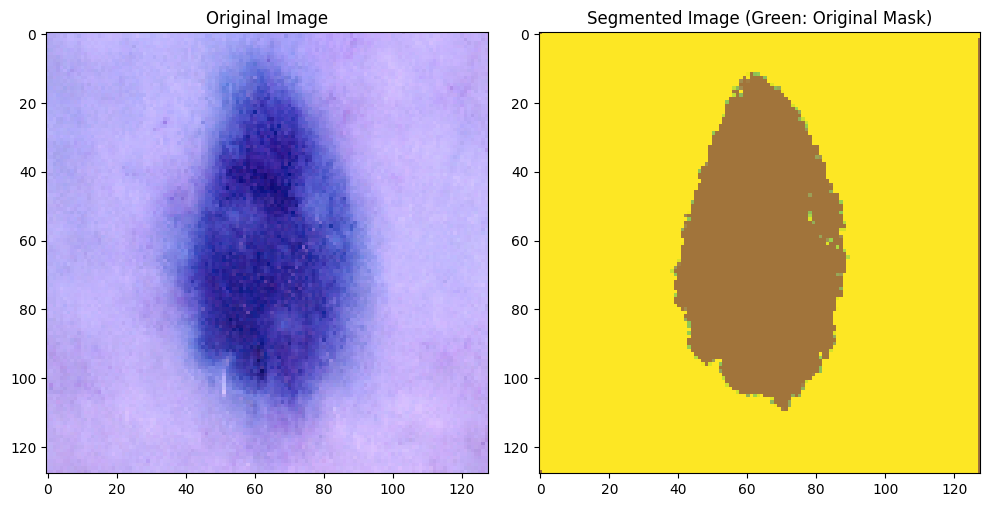

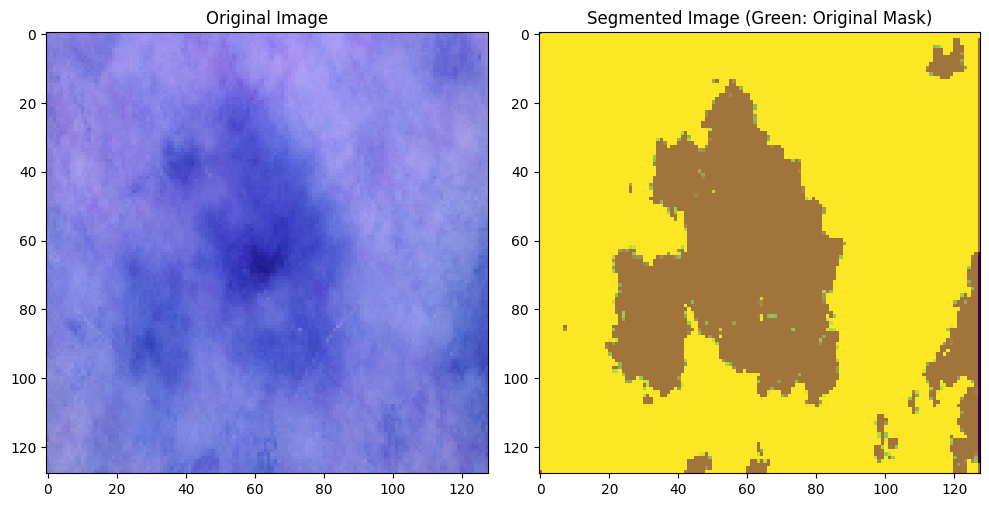

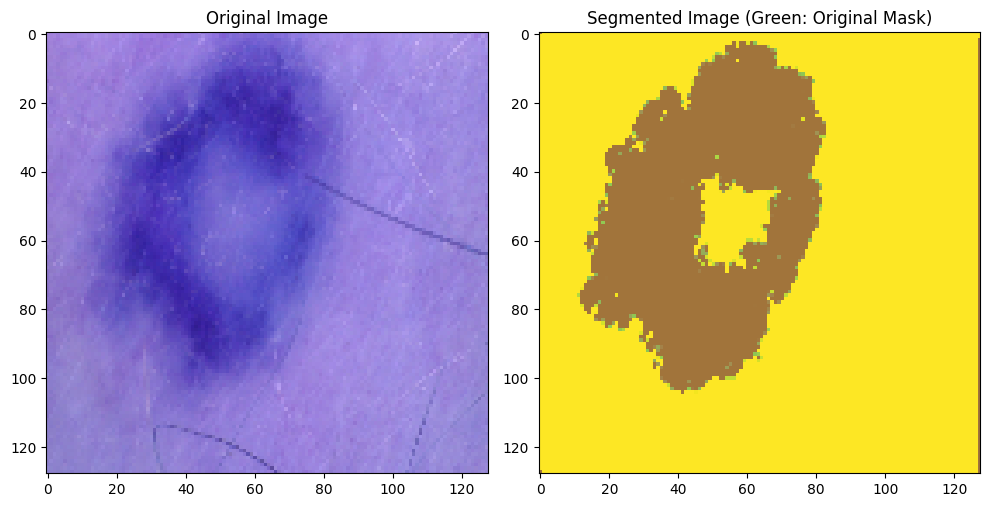

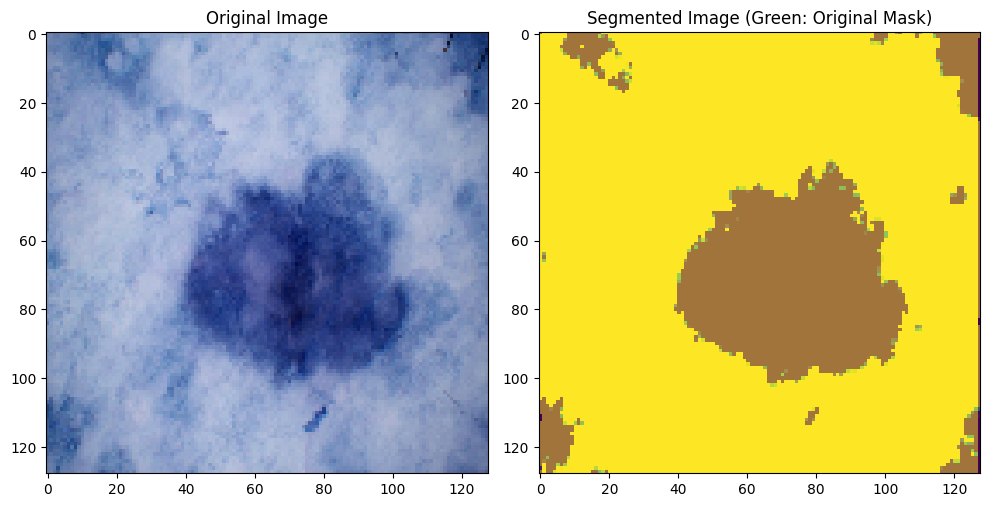

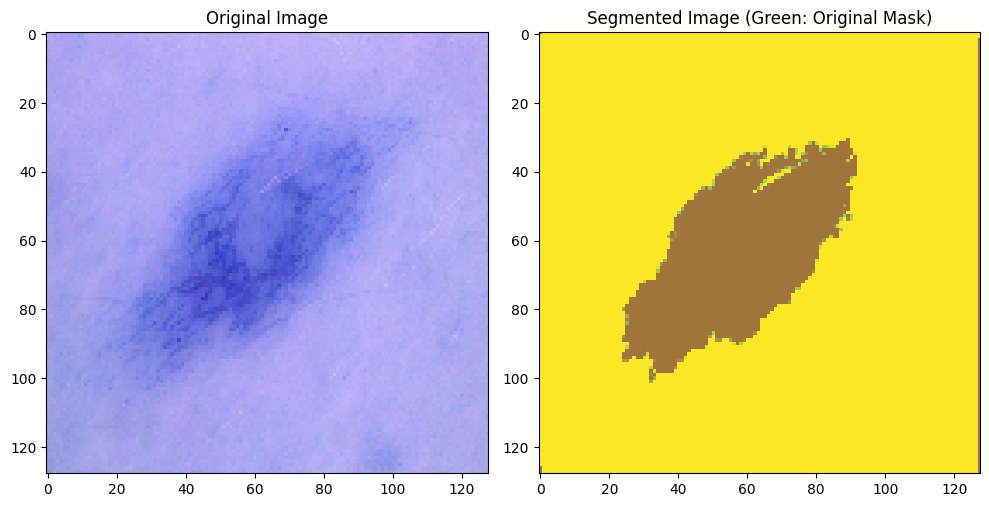

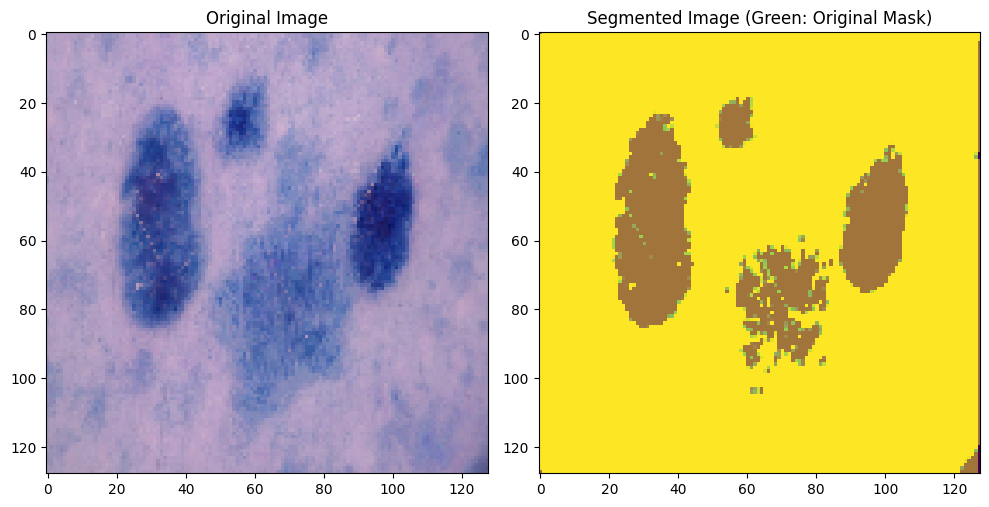

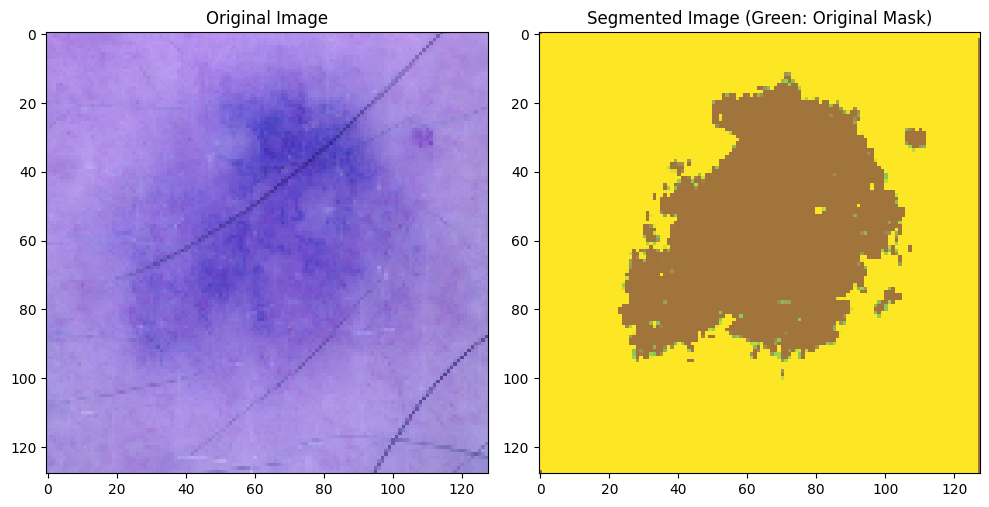

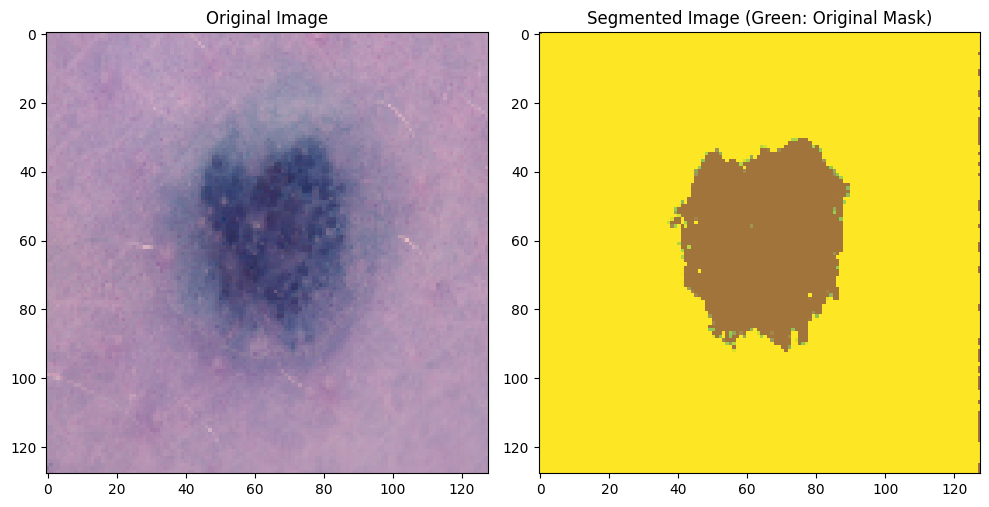

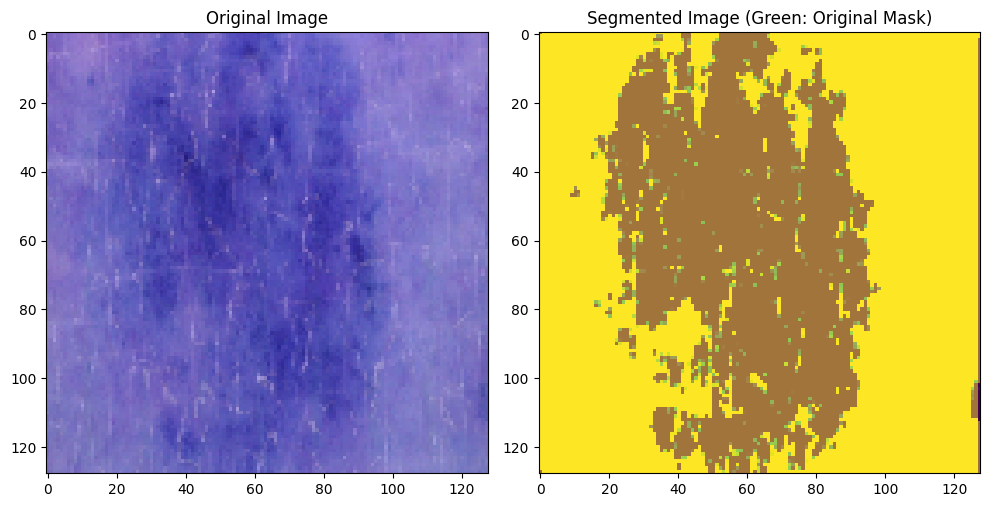

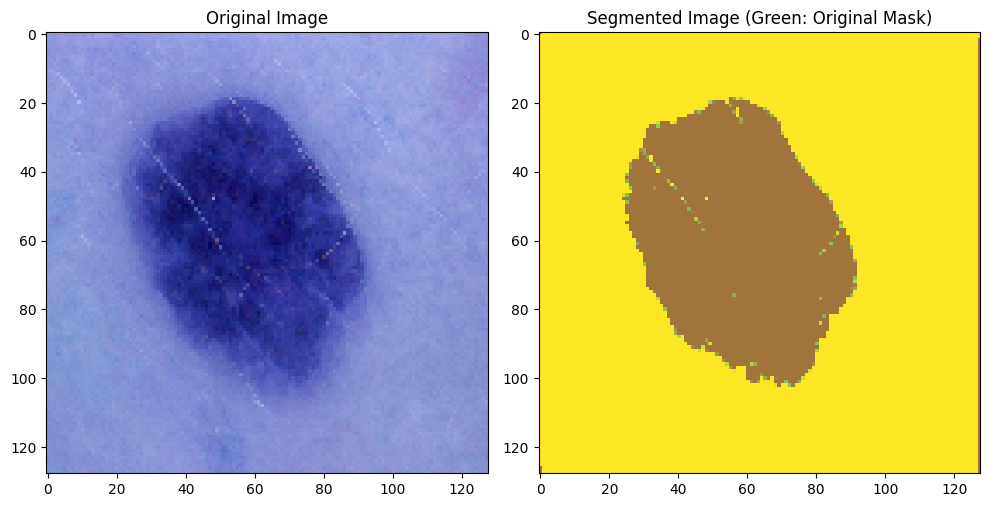

KeyboardInterrupt: ignored

In [ ]:
num_samples = len(x_test)

for i in range(num_samples):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i])
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_predicted_masks[i])
    plt.imshow(y_test[i], alpha=0.5, cmap='viridis')  # Overlay the original mask
    plt.title('Segmented Image (Green: Original Mask)')

    plt.tight_layout()
    plt.show()

63/63 [==============================] - 6s 89ms/step


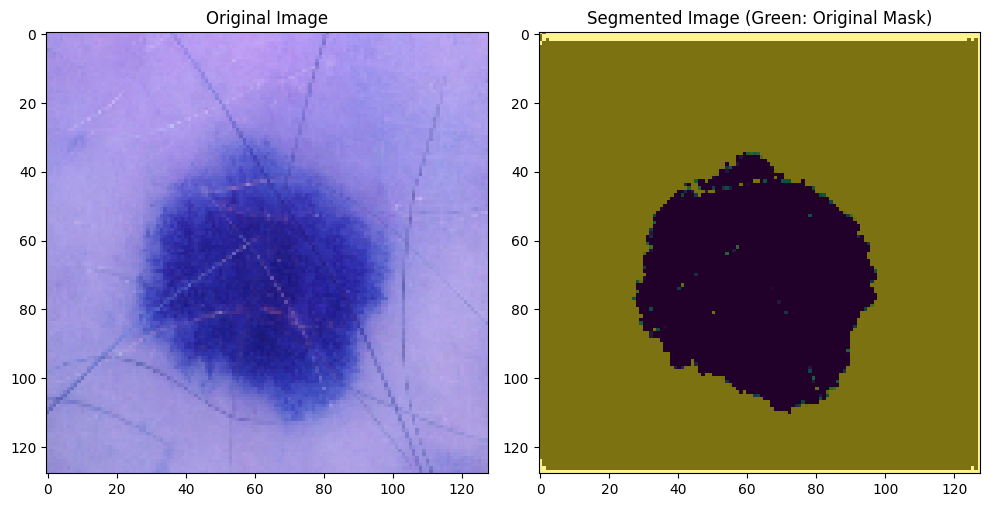

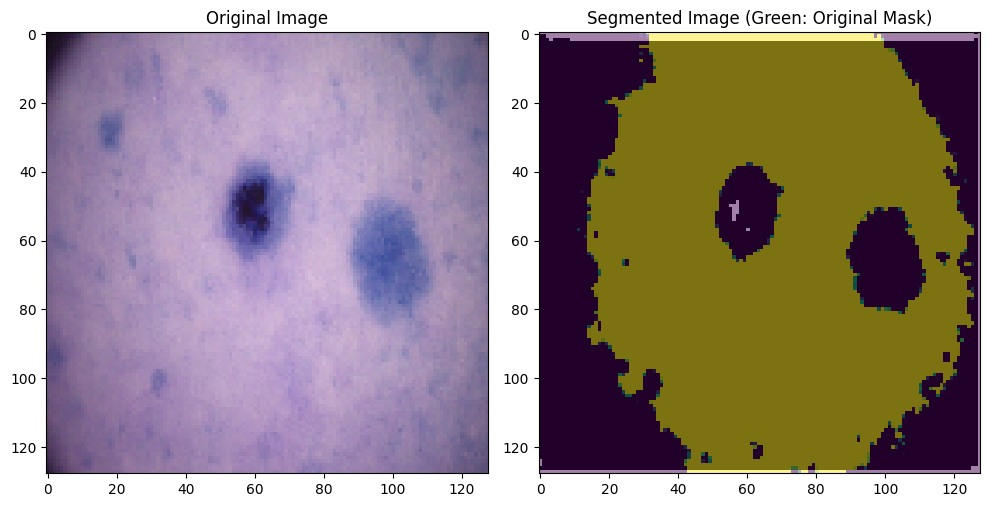

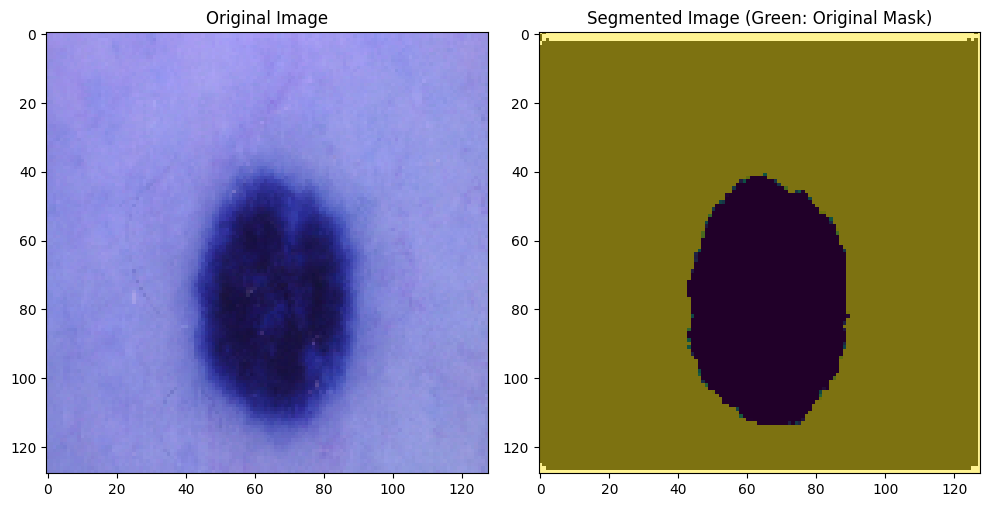

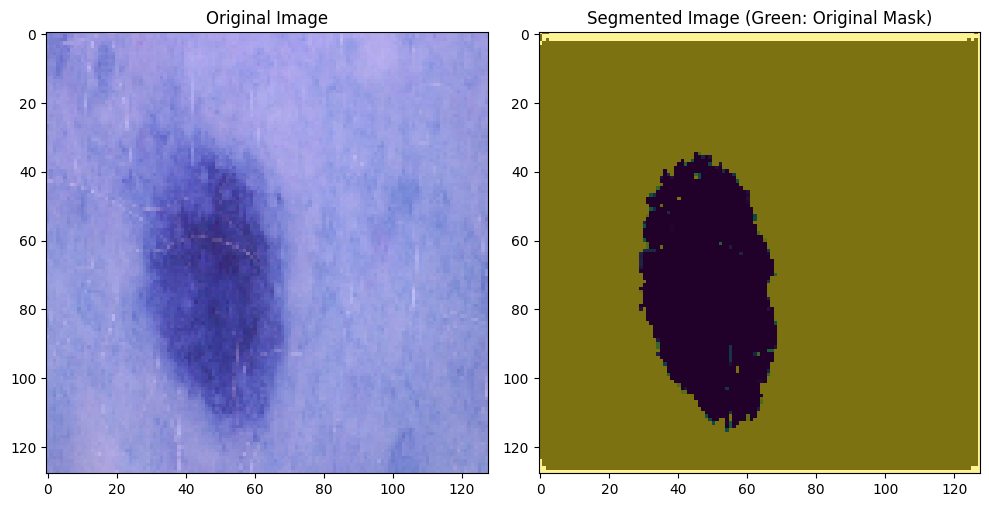

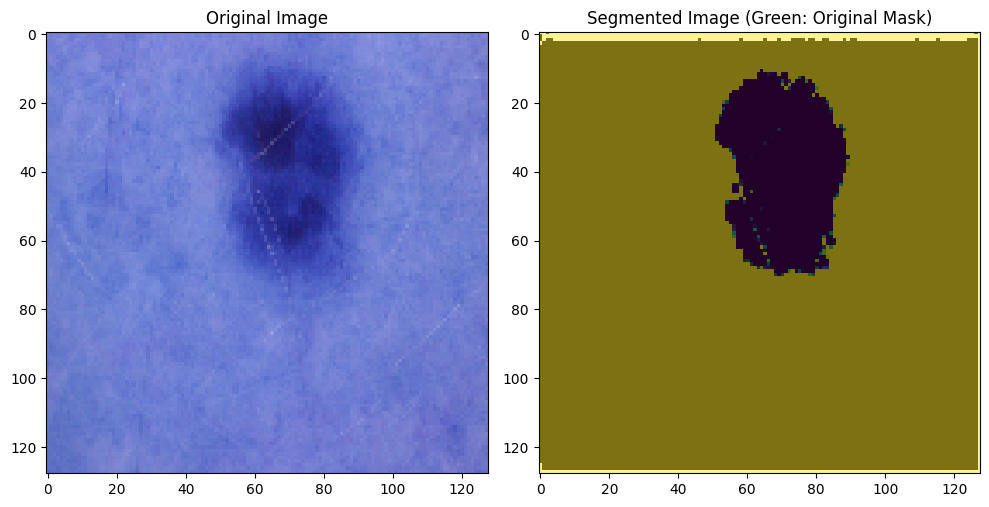

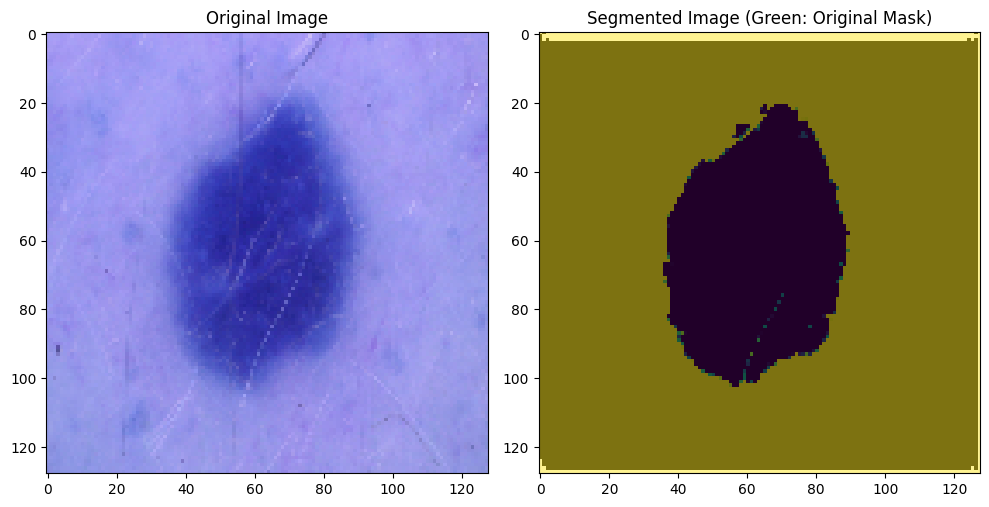

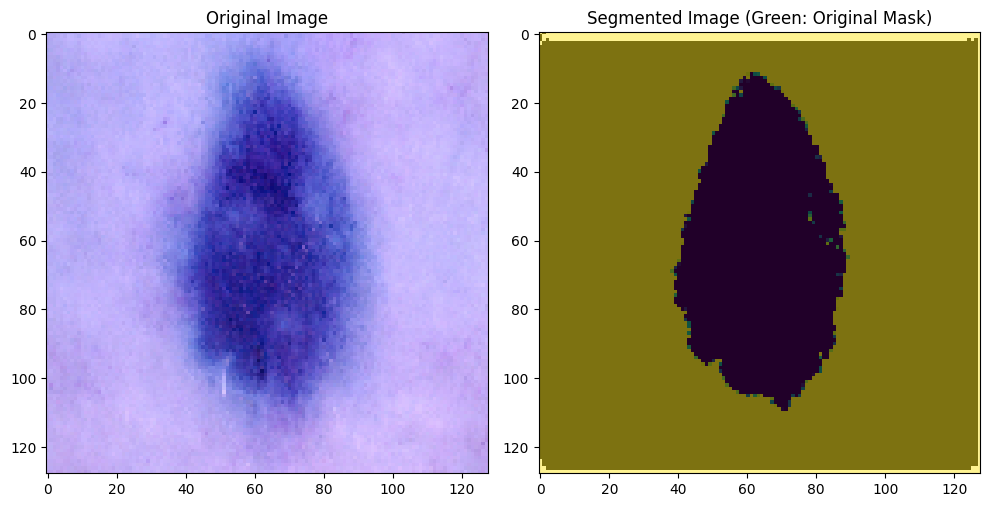

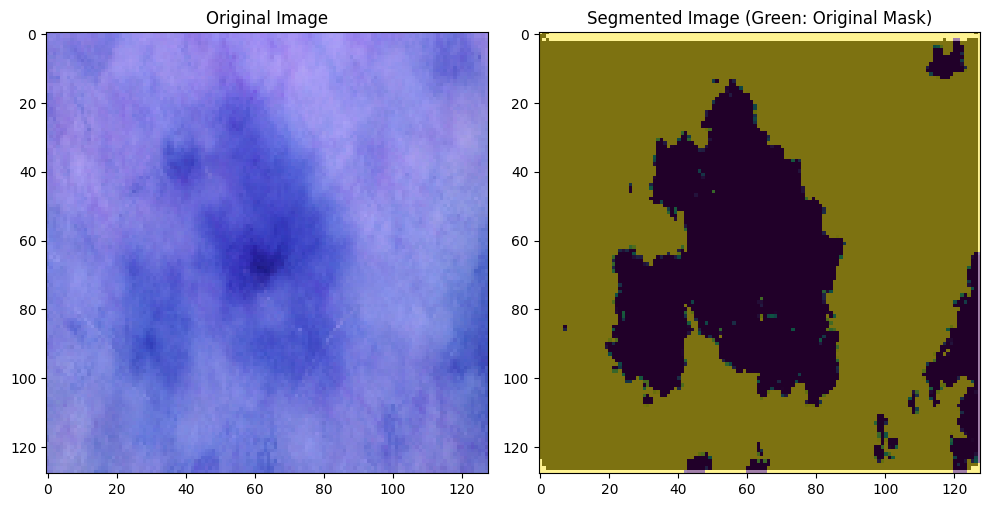

KeyboardInterrupt: ignored

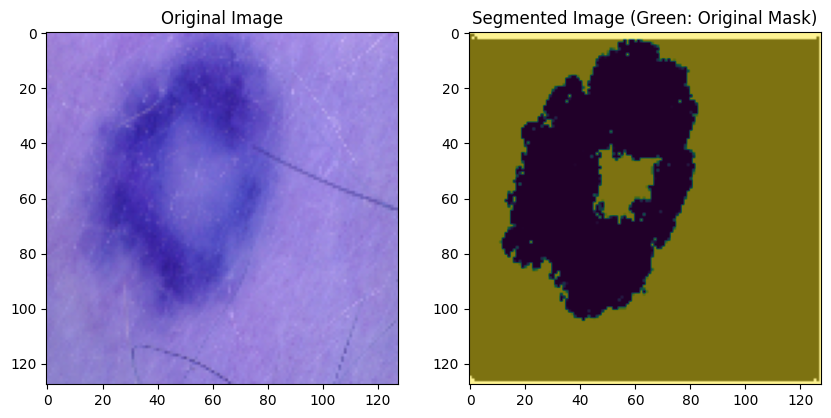

In [ ]:
predicted_masks = model.predict(x_test)

# Assuming predicted_masks are pixel-wise class probabilities, you can threshold them
threshold = 0.5  # Adjust as needed
binary_predicted_masks = (predicted_masks > threshold).astype(np.uint8)

# Visualize segmented images and masks
num_samples = len(x_test)

for i in range(num_samples):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(x_test[i])
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_predicted_masks[i], cmap='gray')
    plt.imshow(y_test[i], alpha=0.5, cmap='viridis')  # Overlay the original mask
    plt.title('Segmented Image (Green: Original Mask)')

    plt.tight_layout()
    plt.show()

In [ ]:
import cv2
import os
import numpy as np

# Path to the folder containing predicted mask images
predicted_mask_folder = '/content/output_mask'
output_folder = 'binary_segmented_images'  # Output folder for binary segmented images
os.makedirs(output_folder, exist_ok=True)

# Threshold value for converting to binary image (adjust as needed)
threshold_value = 128

# Loop through predicted mask images and convert to binary
for mask_filename in os.listdir(predicted_mask_folder):
    mask_path = os.path.join(predicted_mask_folder, mask_filename)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Apply binary thresholding
    _, binary_mask = cv2.threshold(mask, threshold_value, 255, cv2.THRESH_BINARY)

    # Save binary segmented image
    binary_filename = mask_filename.replace('.png', '_binary.png')
    binary_path = os.path.join(output_folder, binary_filename)
    cv2.imwrite(binary_path, binary_mask)

print("Binary segmented images saved in:", output_folder)

Binary segmented images saved in: binary_segmented_images


model.fit(x_train, y_train, batch_size=5, validation_split=0.1)